# Week 4 - Exercise 3.1

In [150]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [151]:
import nsfg
import thinkstats2
import thinkplot

resp = nsfg.ReadFemResp()

In [152]:
pmf = thinkstats2.Pmf(resp.numkdhh, label='Actual')

In [153]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

In [154]:
def UnbiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        if x > 0:
            new_pmf.Mult(x, 1.0/x)
        else:
            print(x, ' ', p)
    
    new_pmf.Normalize()
    return new_pmf

In [155]:
bias_numkdhh = BiasPmf(pmf, label = 'Observed')

In [156]:
unbias_numkdhh = UnbiasPmf(pmf, label = 'Observed') 

0   0.466178202276593


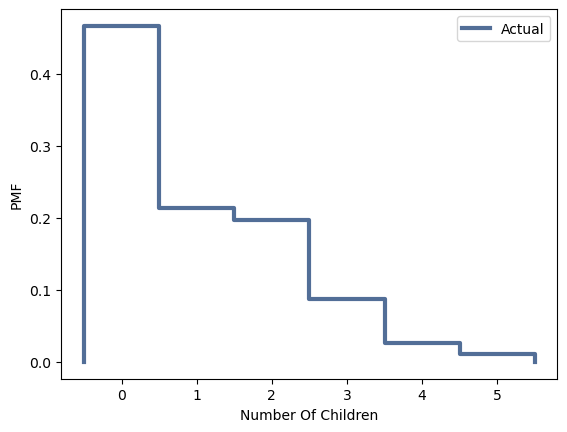

<Figure size 800x600 with 0 Axes>

In [157]:
thinkplot.Pmfs([pmf])
thinkplot.Show(xlabel='Number Of Children', ylabel='PMF')

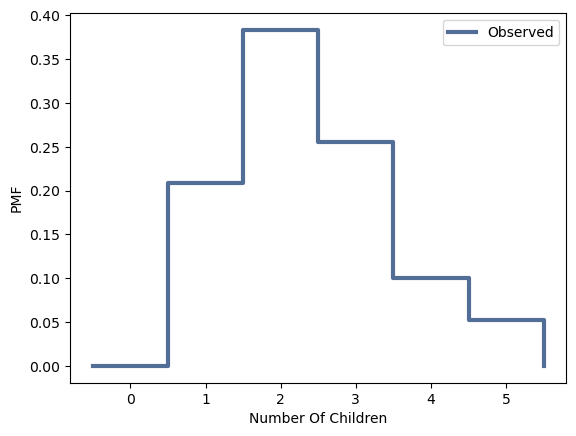

<Figure size 800x600 with 0 Axes>

In [158]:
thinkplot.Pmfs([bias_numkdhh])
thinkplot.Show(xlabel='Number Of Children', ylabel='PMF')

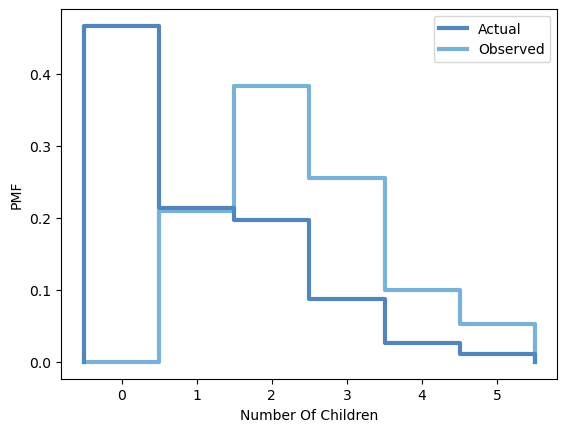

<Figure size 800x600 with 0 Axes>

In [159]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, bias_numkdhh])
thinkplot.Show(xlabel='Number Of Children', ylabel='PMF')

In [160]:
bias_numkdhh.Mean(), pmf.Mean()

(2.403679100664282, 1.024205155043831)

# Week 4 - Exercise 3.2

In [161]:
def PmfMean(pmf):
    mean = 0.0
    for val, idx in pmf.Items():
        mean += val*idx
    return mean
    #return sum(x * freq for x, freq in pmf.Items())

In [162]:
def PmfVar(pmf, calc_mean):
    var = 0.0
    if calc_mean is None:
        #calc_mean = pmf.Mean() # can also use pmf.Mean()
        calc_mean = PmfMean(pmf)
    for val, idx in pmf.Items():
        var += idx * (val - calc_mean)**2
    return var
    #return sum(freq * (x - calc_mean)**2 for x, freq in pmf.Items())

In [163]:
x = PmfMean(pmf)
y = PmfMean(bias_numkdhh)

In [164]:
x, pmf.Mean() 

(1.024205155043831, 1.024205155043831)

In [165]:
y, bias_numkdhh.Mean()

(2.403679100664282, 2.403679100664282)

In [166]:
PmfVar(pmf,x) , pmf.Var()

(1.4128643263531195, 1.4128643263531195)

In [167]:
PmfVar(bias_numkdhh, y) , bias_numkdhh.Var()

(1.1732721055059874, 1.1732721055059874)

# Week 4 - Exercise 4.1

In [168]:
def PositionToPercentile(position, field_size):
    beat = field_size - position + 1
    percentile = 100.0 * beat / field_size
    return percentile

In [169]:
def PercentileToPosition(percentile, field_size):
    beat = percentile * field_size / 100.0
    position = field_size - beat + 1
    return position

In [170]:
def EvalCdf(t, x):
    count = 0.0
    for value in t:
        if value <= x:
            count += 1
    prob = count / len(t)
    return prob

In [171]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
firsts = preg[preg.birthord == 1]
others = preg[preg.birthord != 1]

In [179]:
# Distribution of birth weights
# This code is to test the cdf without using MakeFrames. Can be ignored for grading
#live_cdf = thinkstats2.Cdf(live.totalwgt_lb, label='totalwgt_lb')
#first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='First')
#other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='Other')
#thinkplot.PrePlot(2)
#thinkplot.Cdfs([first_cdf, other_cdf])
#thinkplot.Show(xlabel='Weight(pounds)', ylabel='CDF')

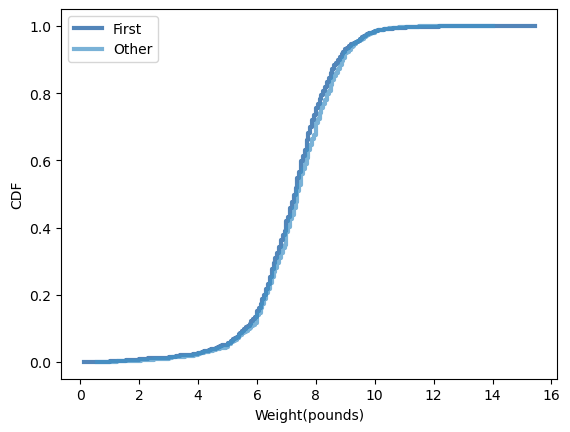

<Figure size 800x600 with 0 Axes>

In [173]:
# Distribution of birth weights
# This code is to test the cdf using MakeFrames as required for 4.1

import first
live, firsts, others = first.MakeFrames()

live_cdf = thinkstats2.Cdf(live.totalwgt_lb, label='totalwgt_lb')
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='First')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='Other')
thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Show(xlabel='Weight(pounds)', ylabel='CDF')

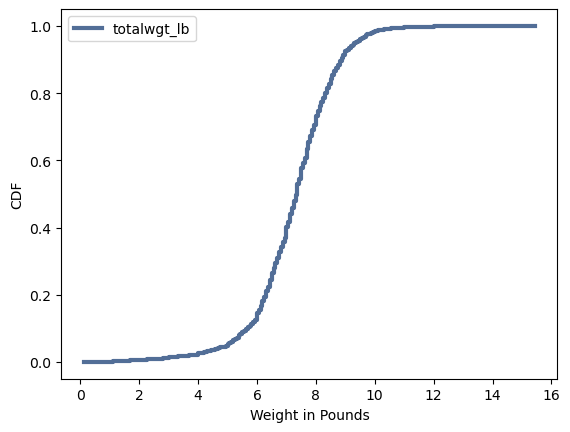

<Figure size 800x600 with 0 Axes>

In [174]:
livecdf = thinkstats2.Cdf(live.totalwgt_lb, label='totalwgt_lb')
thinkplot.Cdf(livecdf)
thinkplot.Show(xlabel='Weight in Pounds', ylabel='CDF')

In [175]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [176]:
live_cdf.PercentileRank(8.5)

84.06727152024784

In [177]:
first_cdf.PercentileRank(8.5)

85.90419436167774

In [183]:
other_cdf.PercentileRank(8.5)

82.35294117647058

# Week 4 - Exercise 4.2

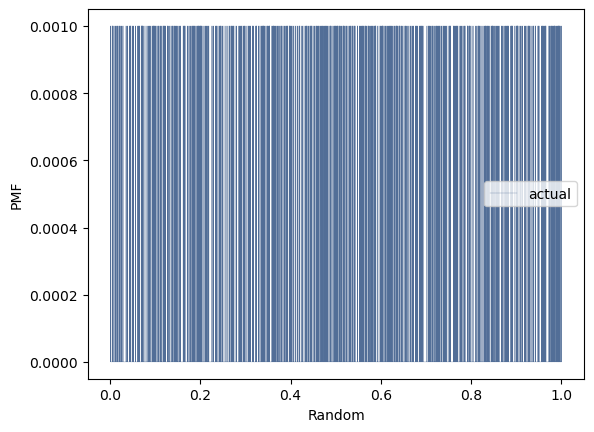

In [184]:
import numpy as np
import pandas as pd

sample = np.random.random(1000) 
pmf = thinkstats2.Pmf(sample, label='actual')
thinkplot.Pmf(pmf, linewidth=0.2)
thinkplot.Config(xlabel='Random', ylabel='PMF')

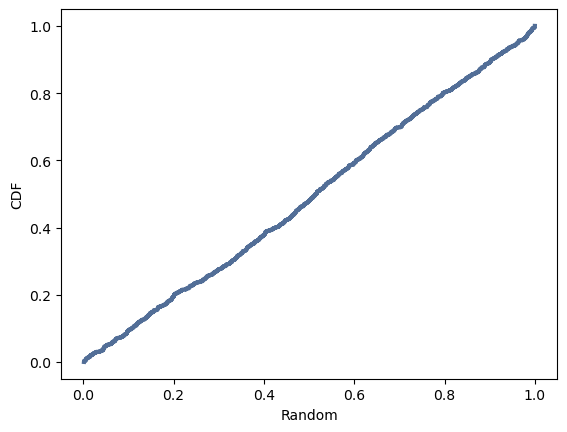

<Figure size 800x600 with 0 Axes>

In [185]:
sample_cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(sample_cdf)
thinkplot.Show(xlabel='Random', ylabel='CDF')

This is a uniform distribution since the cdf is almost a straight line